<a href="https://colab.research.google.com/github/RheyMartt/CCMACLRL_EXERCISE_COM222ML/blob/main/Exercise5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5B

# House Price Prediction using Multiple Linear Regression

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

### Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.  The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.  

### Instructions:
Choose the independent variables to creata a decent predictive model using multiple linear regression

## Import libraries 🐍

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## A. Understanding the Dataset

In [268]:
df = pd.read_csv("house_prices.csv")

In [269]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
414,3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
392,3500000,3990,3,1,2,yes,no,no,no,no,0,no,semi-furnished
483,2940000,6615,3,1,2,yes,no,no,no,no,0,no,semi-furnished
386,3535000,3850,3,1,1,yes,no,no,no,no,2,no,unfurnished
52,7350000,6000,4,2,4,yes,yes,no,no,yes,1,no,furnished
227,4690000,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished
114,6020000,6800,2,1,1,yes,yes,yes,no,no,2,no,furnished
76,6650000,6420,3,2,3,yes,no,no,no,yes,0,yes,furnished
369,3675000,3600,2,1,1,yes,no,no,no,no,0,no,furnished
197,4956000,2800,3,2,2,no,no,yes,no,yes,1,no,semi-furnished


In [270]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [271]:
df.shape # data shape

(545, 13)

In [272]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [273]:
df.isnull().sum() # null values check

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [274]:
df.duplicated().sum() # duplicate values check

0

## B. Data Visualization

1. Use a `.scatterplot()` to check the relationship between area and price

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


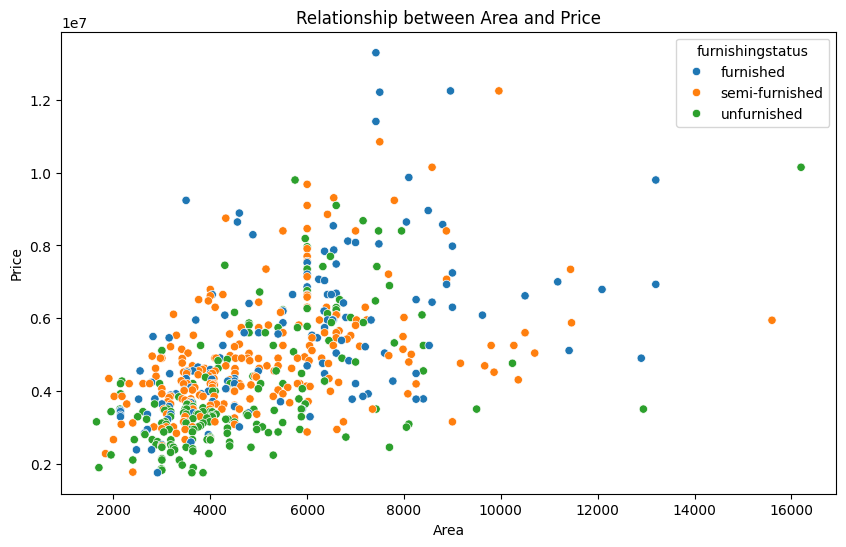

In [275]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='furnishingstatus', data=df)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Relationship between Area and Price')
plt.show()

2. Create a `.pairplot()` to check the relationships between the independent and dependent variables

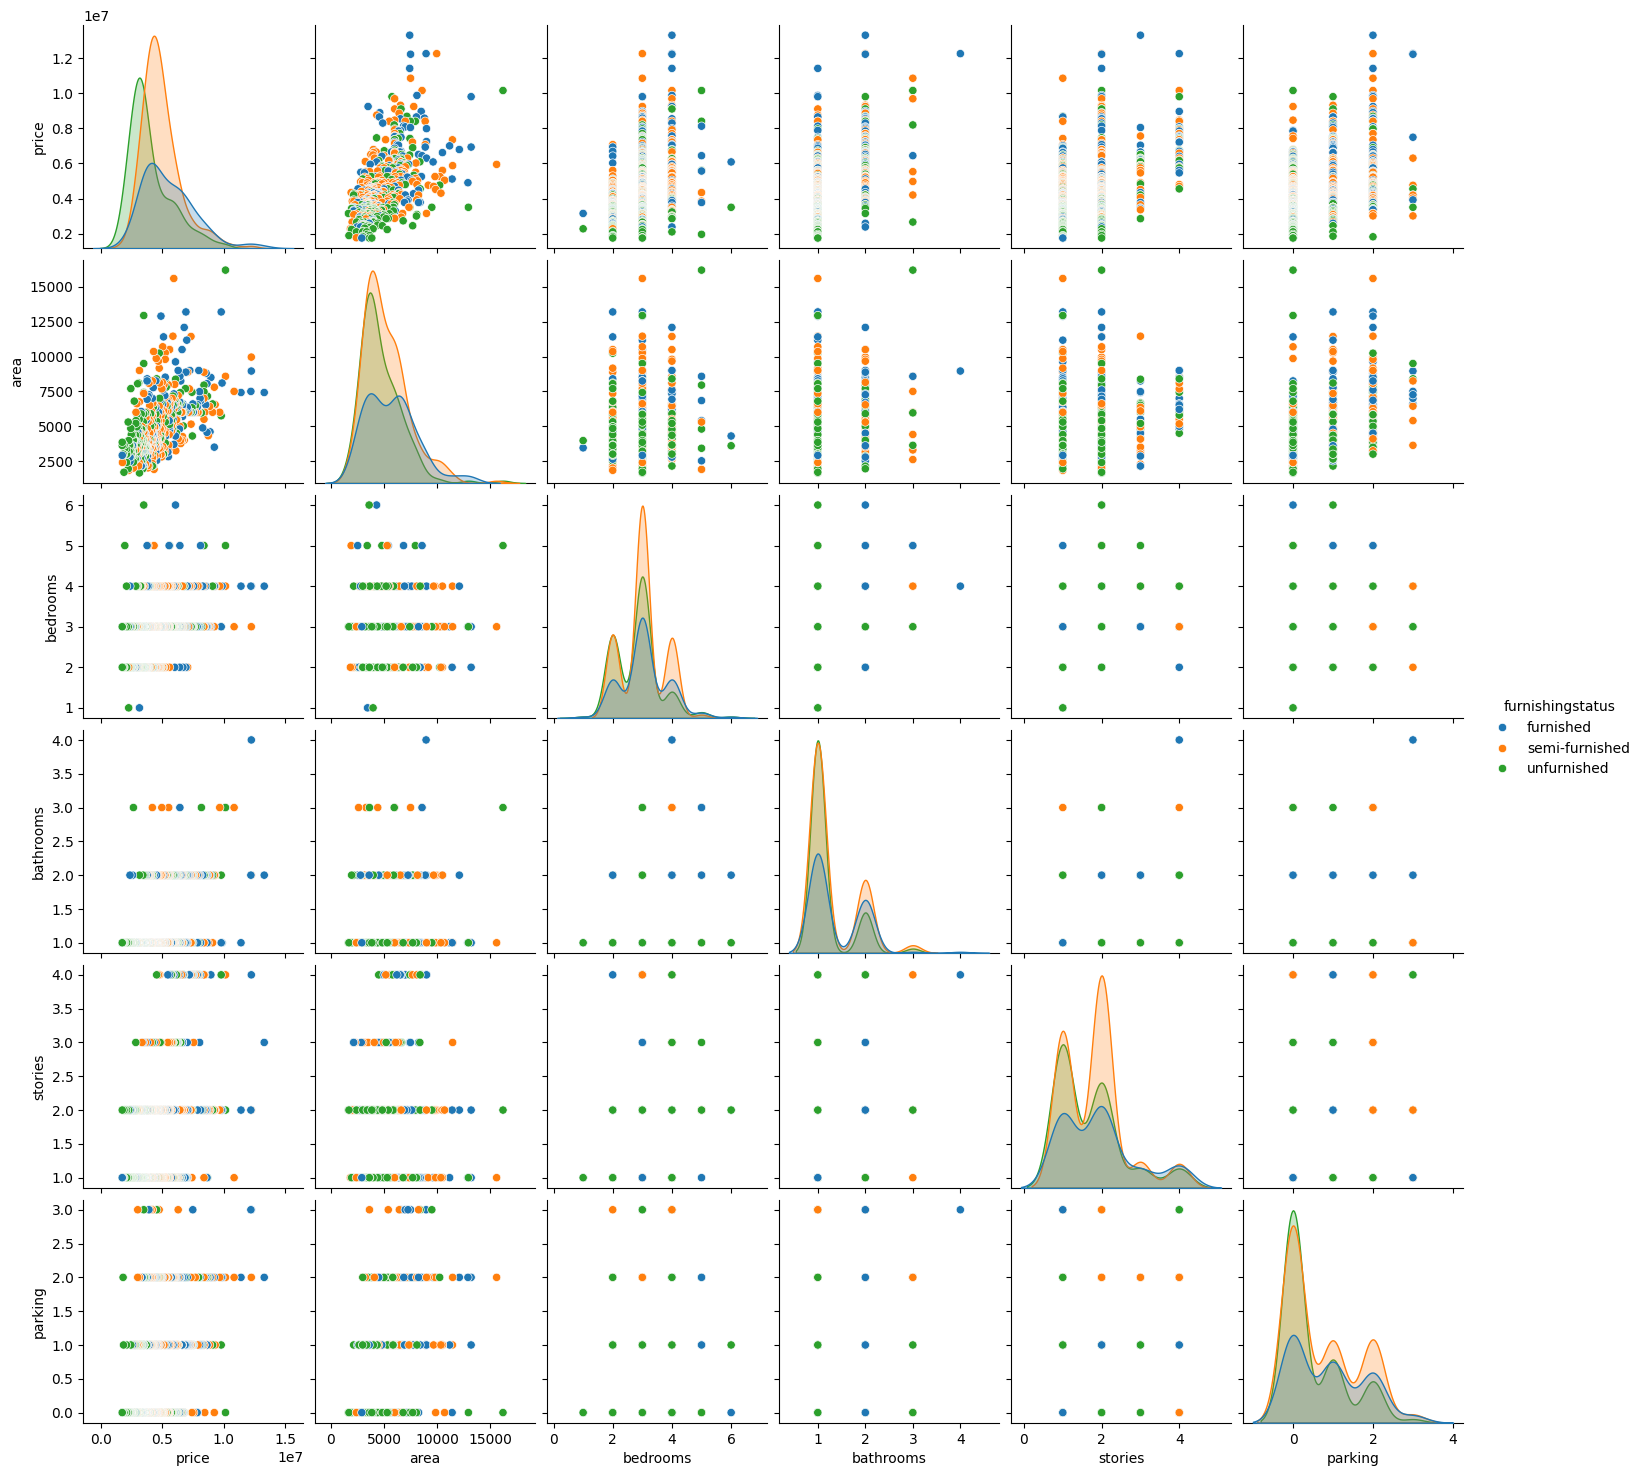

In [276]:
sns.pairplot(df, hue = "furnishingstatus")
plt.show()

## C. Data pre-processing

3. Create a copy of the dataframe using `.copy()`

In [277]:
df_copy = df.copy()

In [278]:
df_copy.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

4. Apply the `get_dummies()` method to convert the categorical columns below into numbers/dummy variables.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [279]:
categorical_columns = ['furnishingstatus', 'mainroad', 'guestroom', 'basement',
                       'hotwaterheating', 'airconditioning', 'prefarea']

# Filter out columns that don't exist in df_copy
existing_columns = [col for col in categorical_columns if col in df_copy.columns]

# Apply get_dummies only to existing columns
df_copy = pd.get_dummies(df_copy, columns=existing_columns, drop_first=True)


5. Concatenate the converted columns to the dataframe copy using `.concat()`

In [280]:
df_copy = pd.concat([df_copy, pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus')], axis=1)

6. Drop the categorical columns below using `.drop()`.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [281]:
df_copy.drop(['furnishingstatus_furnished', 'mainroad', 'guestroom',
              'basement', 'hotwaterheating', 'airconditioning', 'prefarea'],
             axis=1, inplace=True, errors='ignore')

## D. Feature Selection

7. Use `.corr()` to check for multicollinearity between the features/independent variables

In [282]:
df_copy.corr()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.063656,-0.280587,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.006156,-0.142278,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.050040,-0.126252,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.029834,-0.132107,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,-0.003648,-0.082972,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.041327,-0.165705,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
furnishingstatus_semi-furnished,0.063656,0.006156,0.050040,0.029834,-0.003648,0.041327,1.000000,-0.588405,0.011450,0.005821,0.050284,0.063819,-0.053179,-0.011535,1.000000,-0.588405
furnishingstatus_unfurnished,-0.280587,-0.142278,-0.126252,-0.132107,-0.082972,-0.165705,-0.588405,1.000000,-0.133123,-0.099023,-0.117935,-0.059194,-0.094086,-0.081271,-0.588405,1.000000
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,0.011450,-0.133123,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.005821,-0.099023,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023


8. Create a heatmap using `.heatmap()` to visualize the correlation in a plot.

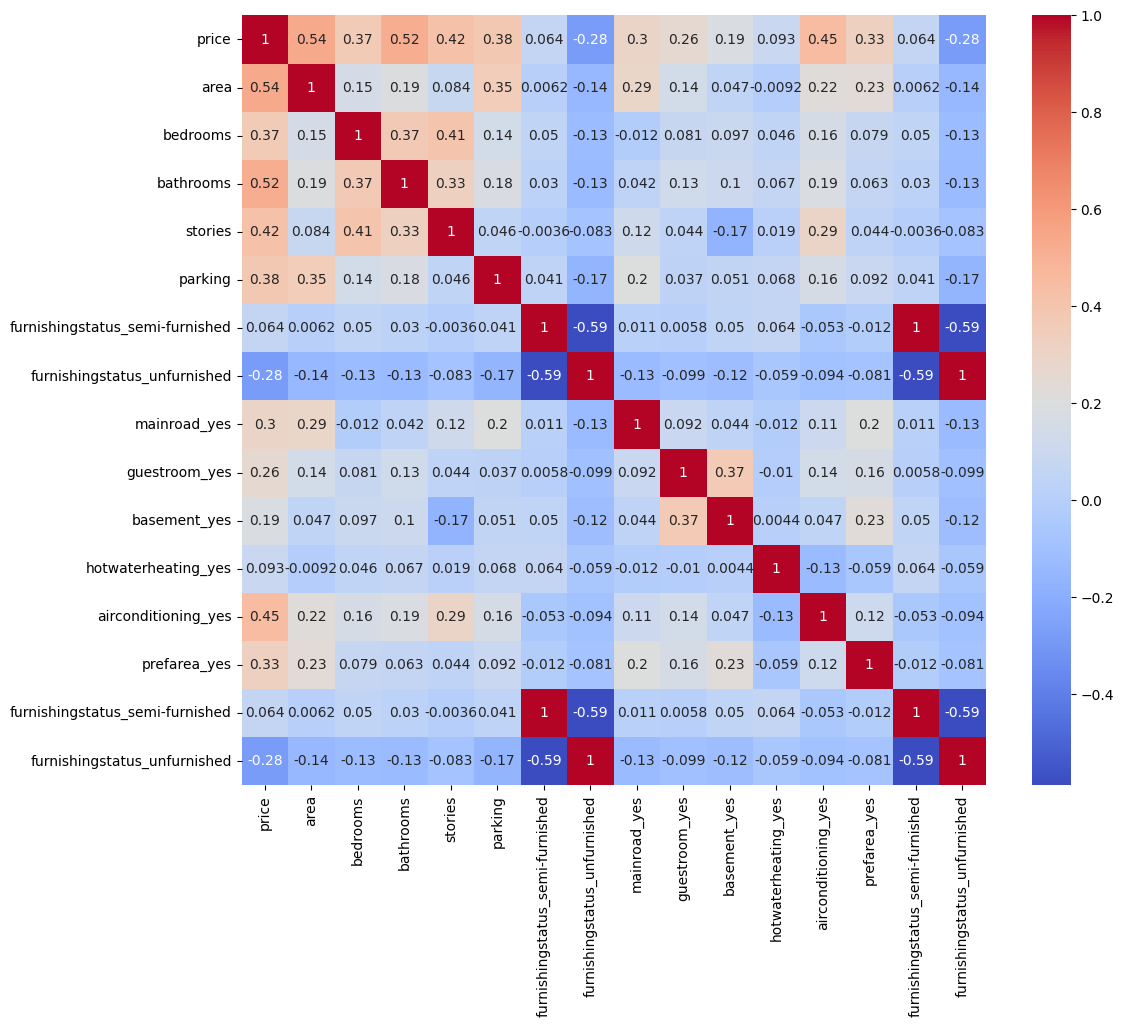

In [283]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=True)
plt.show()

## E. Building the Model



9. Split the data set into a training and test set

In [284]:
X = df_copy.drop(['price', 'hotwaterheating_yes', 'guestroom_yes'], axis=1)
X = sm.add_constant(X)
y = df_copy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [285]:
df_copy.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,False,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,False,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,False,False,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,False,True,True,True,False,True,False,False,False


In [286]:
df_copy.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

10. Use the the `MinMaxScaler()` method to apply scaling on the independent variables in the training and test set.

In [287]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

11. Create a new dataframe containing the unscaled features

In [288]:
df_unscaled = pd.DataFrame(X_train, columns=X.columns)
df_unscaled.head()

,const,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
9,1.0,5750,3,2,4,1,False,True,True,False,True,True,False,True
348,1.0,3150,2,2,1,0,True,False,False,True,False,False,True,False
94,1.0,6000,4,2,4,1,True,False,True,False,False,False,True,False
257,1.0,8250,3,1,1,0,False,False,True,False,False,False,False,False
44,1.0,6000,4,2,4,1,False,False,True,False,True,False,False,False


12. Create a new dataframe containing the scaled features

In [289]:
df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
df_scaled.head()

,const,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,basement_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,0.293907,0.4,0.333333,1.0,0.333333,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.107527,0.2,0.333333,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.311828,0.6,0.333333,1.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.473118,0.4,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.311828,0.6,0.333333,1.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


13. Create a new instance of a Linear Regression model  

In [290]:
model = LinearRegression()

14. Use the `fit()` method to train your model using the training set.

In [291]:
model.fit(X_train_scaled, y_train)

LinearRegression()

15. Use the `predict()` method using the test set

In [292]:
y_pred = model.predict(X_test_scaled)


16. Compute the $R^2$ of the model

In [293]:
olsmod = sm.OLS(y_test, X_test_scaled)
olsres = olsmod.fit()
print(olsres.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              375.7
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                   1.08e-104
Time:                        10:03:56   Log-Likelihood:                         -2487.7
No. Observations:                 164   AIC:                                      4997.
Df Residuals:                     153   BIC:                                      5032.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [294]:
olsres.rsquared

0.9643033959602182